In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Cargar el dataset
file_path = 'dataset/suco.csv'
data = pd.read_csv(file_path, delimiter=';')

/var/folders/xx/fj7dzt957rd1sg25bl4jv1b00000gn/T/ipykernel_73325/3482277963.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


In [3]:
data.shape 

(560931, 30)

In [4]:

# Convertir columnas de fechas a objetos datetime
date_columns = ['FECHA_FACTURA', 'MAX_FECHA_COBRO', 'FECHA_CONTABILIZACION']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

/var/folders/xx/fj7dzt957rd1sg25bl4jv1b00000gn/T/ipykernel_73325/153277072.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
/var/folders/xx/fj7dzt957rd1sg25bl4jv1b00000gn/T/ipykernel_73325/153277072.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
/var/folders/xx/fj7dzt957rd1sg25bl4jv1b00000gn/T/ipykernel_73325/153277072.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [5]:
# Extraer características de las fechas
for col in date_columns:
    data[col + '_YEAR'] = data[col].dt.year
    data[col + '_MONTH'] = data[col].dt.month
    data[col + '_DAY'] = data[col].dt.day
    data[col + '_WEEKDAY'] = data[col].dt.weekday

In [6]:

# Eliminar las columnas originales de fecha si ya no son necesarias
data.drop(columns=date_columns, inplace=True)


In [7]:
columns_to_drop = ['EMPRESA', 'NUMERO_FACTURA', 'NUMERO_ASIENTO_BORRADOR', 'DIVISA', 'TIPO_FACTURA', 'DIARIO', 'IMPORTE_COBRADO_FRA', 'CUENTA_CONTABLE','NUM_EFECTOS_COBRADOS', 'NUM_EFECTOS_PARCIAL', 'NUM_EFECTOS_IMPAGADO', 'NUM_EFECTOS_FUERA_PLAZO', 'NUM_EFECTOS_PDTE_EN_PLAZO']
data.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Convertir todas las entradas en las columnas categóricas a cadenas
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].astype(str)


In [9]:

# Convertir columnas categóricas a variables numéricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [10]:

# Visualización inicial del dataset
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,EJERCICIO,NUMERO_SERIE,ORGANIZACION_COMERCIAL,CLIENTE,MES_FACTURA,FORMA_COBRO,CENTRO_CONTABLE,LIQUIDO_FACTURA,ALBARAN_FACTURA,ENVIO_ELECTRONICO,...,FECHA_FACTURA_DAY,FECHA_FACTURA_WEEKDAY,MAX_FECHA_COBRO_YEAR,MAX_FECHA_COBRO_MONTH,MAX_FECHA_COBRO_DAY,MAX_FECHA_COBRO_WEEKDAY,FECHA_CONTABILIZACION_YEAR,FECHA_CONTABILIZACION_MONTH,FECHA_CONTABILIZACION_DAY,FECHA_CONTABILIZACION_WEEKDAY
0,2020,2,2010,16744,1,9,201,136325,1,0,...,15,2,NaN,NaN,NaN,NaN,2020,1,15,2
1,2020,2,2010,2281,1,8,201,280414,1,0,...,15,2,NaN,NaN,NaN,NaN,2020,1,15,2
2,2020,2,2010,10807,1,4,201,249341,1,0,...,15,2,2020.0,2.0,29.0,5.0,2020,1,15,2
3,2020,2,2010,2099,1,4,201,198149,1,0,...,15,2,2020.0,2.0,20.0,3.0,2020,1,15,2
4,2020,2,2010,2148,1,4,201,100254,1,0,...,15,2,2020.0,2.0,14.0,4.0,2020,1,15,2


In [11]:
# Análisis Exploratorio de Datos (EDA)
# Resumen estadístico
print("\nResumen estadístico del dataset:")
data.describe()


Resumen estadístico del dataset:


,EJERCICIO,NUMERO_SERIE,ORGANIZACION_COMERCIAL,CLIENTE,MES_FACTURA,FORMA_COBRO,CENTRO_CONTABLE,LIQUIDO_FACTURA,ALBARAN_FACTURA,ENVIO_ELECTRONICO,...,FECHA_FACTURA_DAY,FECHA_FACTURA_WEEKDAY,MAX_FECHA_COBRO_YEAR,MAX_FECHA_COBRO_MONTH,MAX_FECHA_COBRO_DAY,MAX_FECHA_COBRO_WEEKDAY,FECHA_CONTABILIZACION_YEAR,FECHA_CONTABILIZACION_MONTH,FECHA_CONTABILIZACION_DAY,FECHA_CONTABILIZACION_WEEKDAY
count,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,560931.000000,...,560931.000000,560931.000000,449088.000000,449088.000000,449088.000000,449088.000000,560931.000000,560931.000000,560931.000000,560931.000000
mean,2021.022650,18.175161,3036.667957,9302.817429,6.341851,25.953533,303.641936,155163.186768,0.856143,0.333519,...,17.795314,2.246503,2021.095527,6.484484,19.973651,2.204893,2021.022650,6.341851,17.795314,2.246503
std,1.865189,11.221685,1191.954915,5879.198520,3.381918,16.787098,119.237543,85366.446594,0.350945,0.471470,...,8.476750,1.488717,1.828212,3.402030,8.675762,1.559997,1.865189,3.381918,8.476750,1.488717
min,2018.000000,0.000000,1012.000000,4.000000,1.000000,0.000000,101.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,2019.000000,9.000000,2010.000000,4880.000000,3.000000,8.000000,201.000000,82378.500000,1.000000,0.000000,...,11.000000,1.000000,2020.000000,4.000000,13.000000,1.000000,2019.000000,3.000000,11.000000,1.000000
50%,2021.000000,16.000000,4010.000000,8938.000000,6.000000,30.000000,401.000000,161264.000000,1.000000,0.000000,...,18.000000,2.000000,2021.000000,6.000000,21.000000,2.000000,2021.000000,6.000000,18.000000,2.000000
75%,2023.000000,24.000000,4010.000000,13531.000000,9.000000,42.000000,401.000000,226788.500000,1.000000,1.000000,...,25.000000,3.000000,2023.000000,9.000000,28.000000,4.000000,2023.000000,9.000000,25.000000,3.000000
max,2024.000000,53.000000,4010.000000,24649.000000,12.000000,62.000000,401.000000,302790.000000,1.000000,1.000000,...,31.000000,6.000000,2024.000000,12.000000,31.000000,6.000000,2024.000000,12.000000,31.000000,6.000000


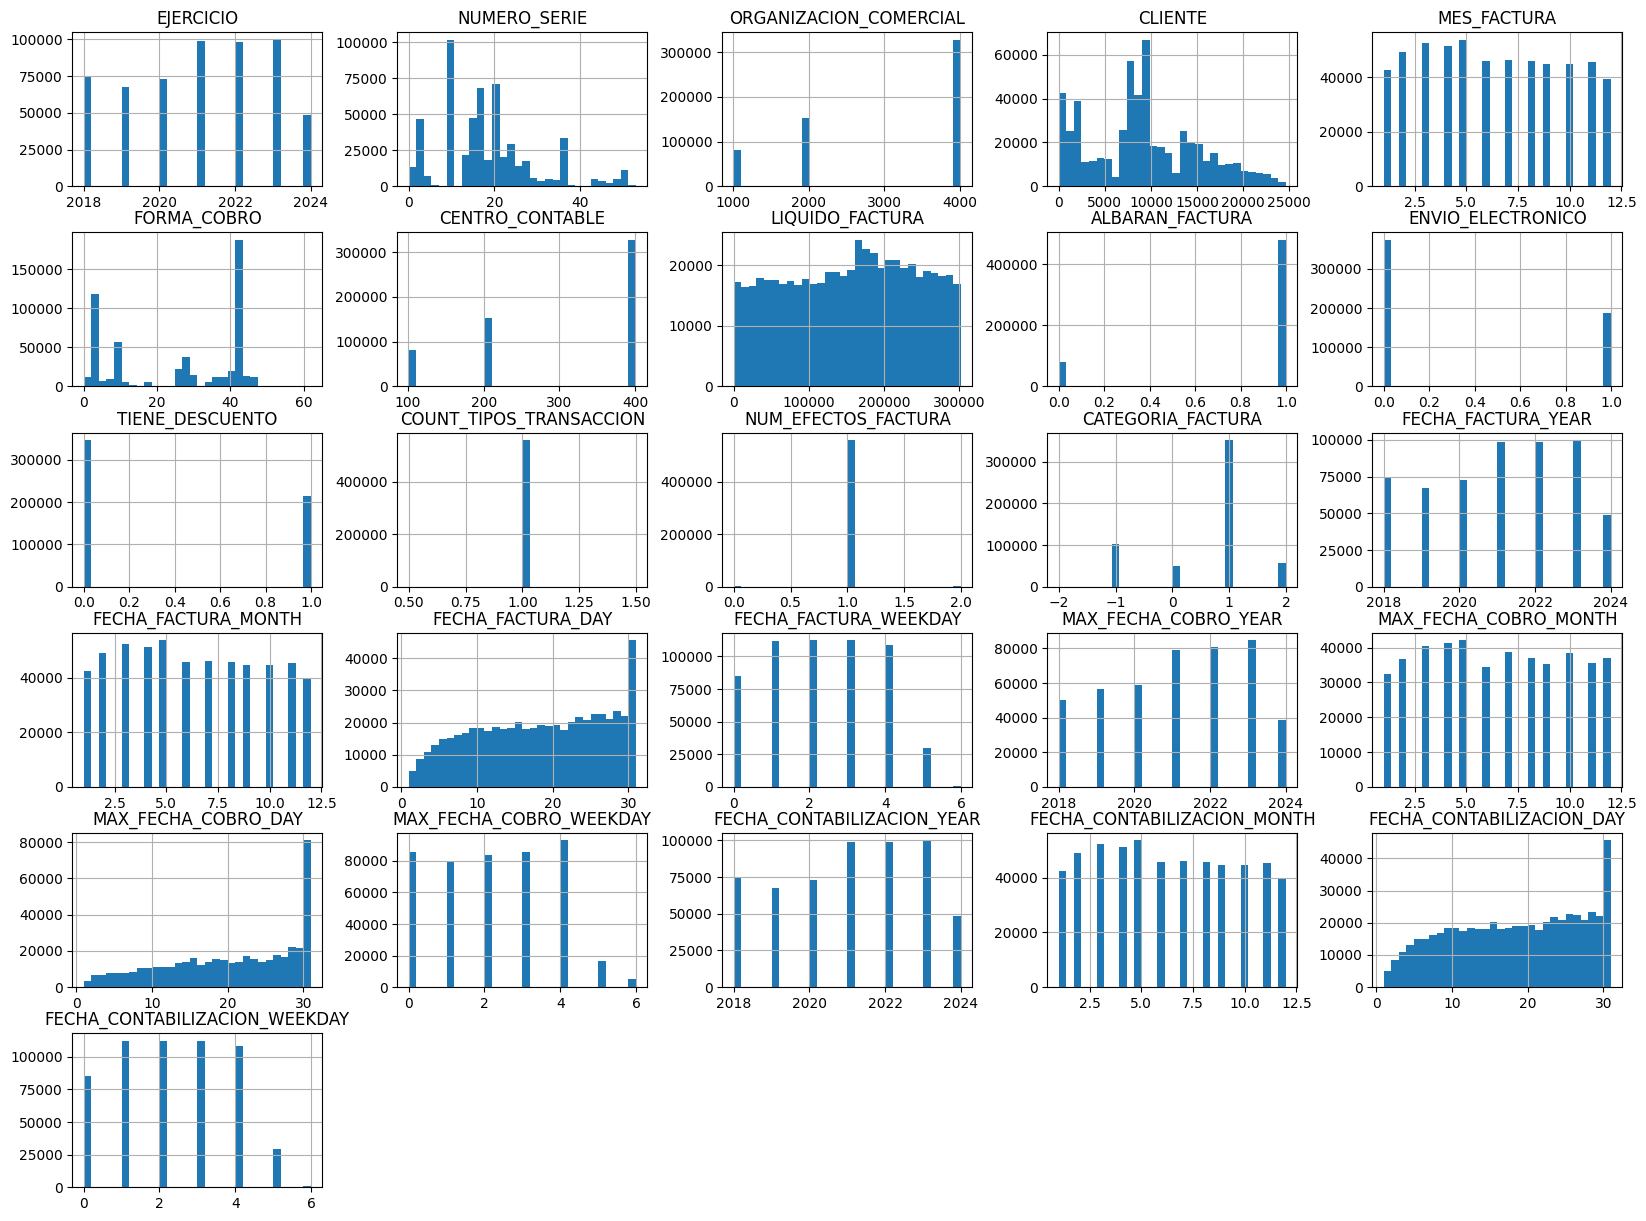

In [12]:

# Distribuciones de las características
data.hist(bins=30, figsize=(20, 15))
plt.show()


In [13]:

# Análisis de valores nulos
print("\nValores nulos en el dataset:")
data.isnull().sum()



Valores nulos en el dataset:


EJERCICIO                             0
NUMERO_SERIE                          0
ORGANIZACION_COMERCIAL                0
CLIENTE                               0
MES_FACTURA                           0
FORMA_COBRO                           0
CENTRO_CONTABLE                       0
LIQUIDO_FACTURA                       0
ALBARAN_FACTURA                       0
ENVIO_ELECTRONICO                     0
TIENE_DESCUENTO                       0
COUNT_TIPOS_TRANSACCION            1318
NUM_EFECTOS_FACTURA                   0
CATEGORIA_FACTURA                     0
FECHA_FACTURA_YEAR                    0
FECHA_FACTURA_MONTH                   0
FECHA_FACTURA_DAY                     0
FECHA_FACTURA_WEEKDAY                 0
MAX_FECHA_COBRO_YEAR             111843
MAX_FECHA_COBRO_MONTH            111843
MAX_FECHA_COBRO_DAY              111843
MAX_FECHA_COBRO_WEEKDAY          111843
FECHA_CONTABILIZACION_YEAR            0
FECHA_CONTABILIZACION_MONTH           0
FECHA_CONTABILIZACION_DAY             0


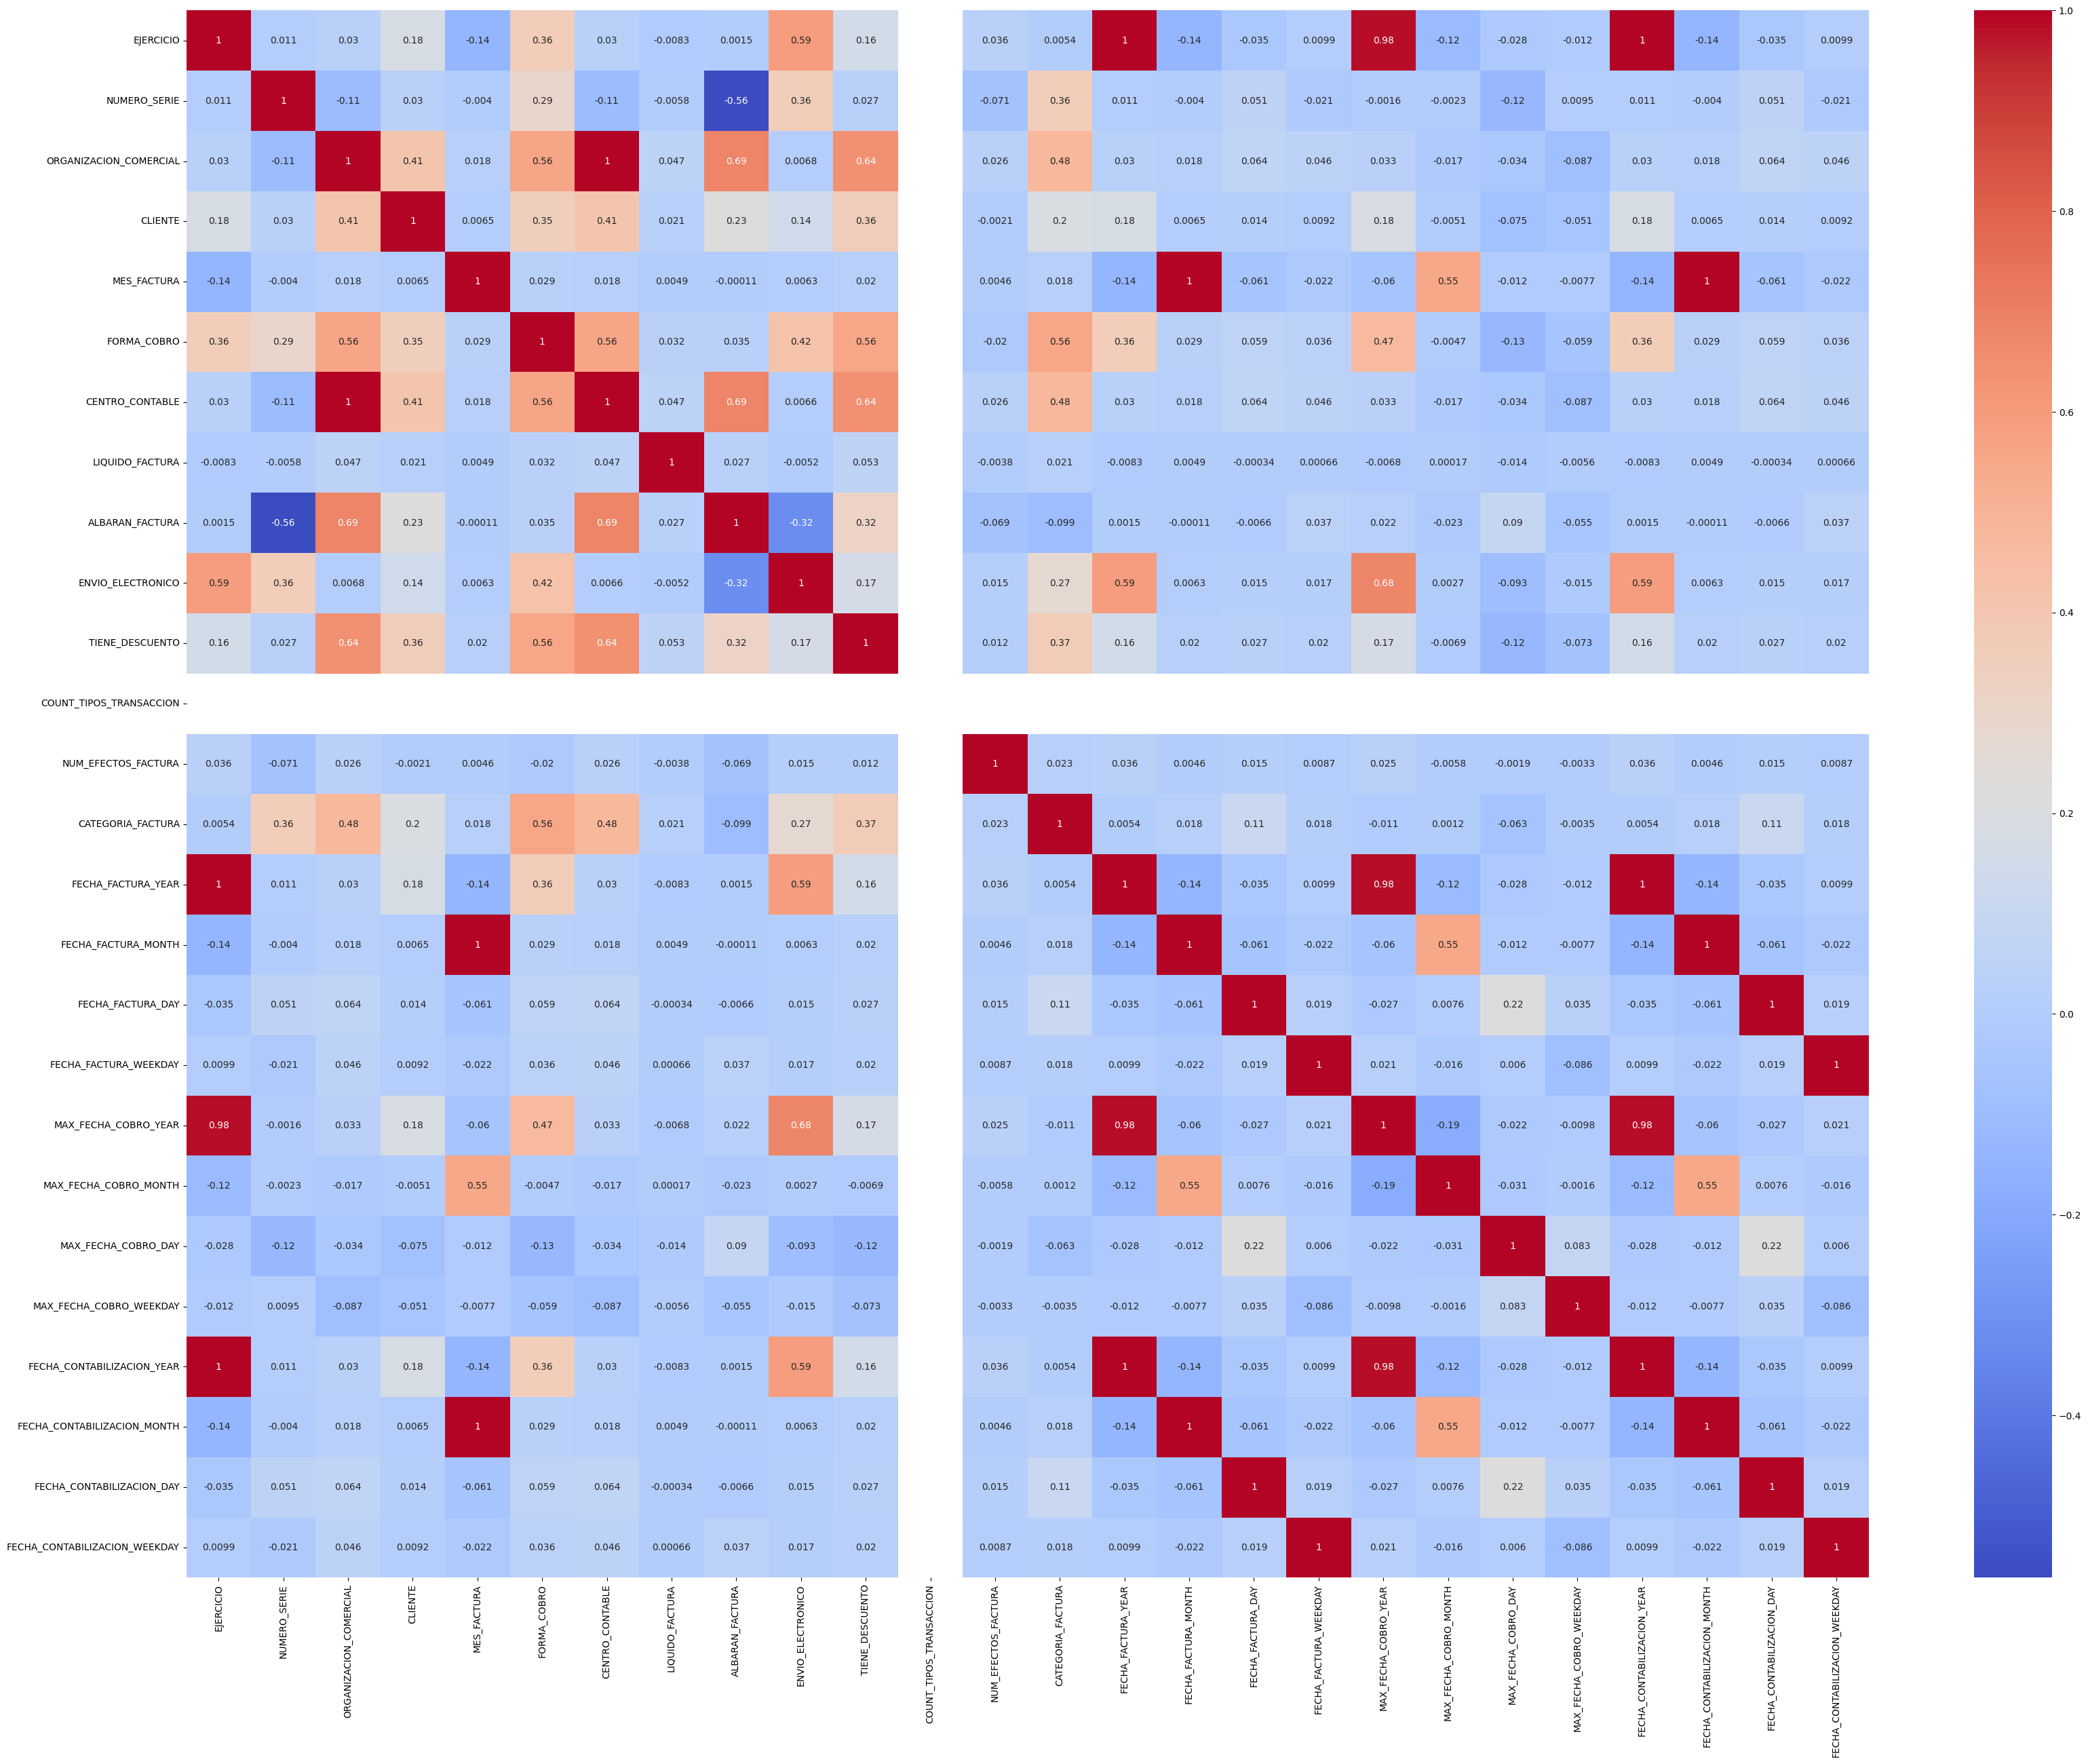

In [14]:
# Correlaciones entre las características
plt.figure(figsize=(40, 30))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:

# Manejo de valores nulos
data.fillna(data.mean(), inplace=True)


In [16]:

# Separación de características y variable objetivo
X = data.drop('CATEGORIA_FACTURA', axis=1)
#y = data['CATEGORIA_FACTURA']
# Re-codificar las clases de la variable objetivo
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(data['CATEGORIA_FACTURA'])


In [17]:

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:

# Entrenamiento y Validación de Modelos de Clasificación

# Árboles de Decisión
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nÁrboles de Decisión:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))



Árboles de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     20826
           2       0.81      0.79      0.80      9942
           3       0.95      0.95      0.95     70120
           4       0.81      0.81      0.81     11299

    accuracy                           0.93    112187
   macro avg       0.71      0.71      0.71    112187
weighted avg       0.93      0.93      0.93    112187

[[    0     0     0     0     0]
 [    0 20793     0    29     4]
 [    0     0  7856  1778   308]
 [    0    21  1587 66636  1876]
 [    1     0   274  1878  9146]]


/Users/bonay/.pyenv/versions/3.10.0/envs/gal_lua/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bonay/.pyenv/versions/3.10.0/envs/gal_lua/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bonay/.pyenv/versions/3.10.0/envs/gal_lua/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [20]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini', max_features='sqrt')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20826
           2       0.85      0.90      0.88      9942
           3       0.95      0.97      0.96     70120
           4       0.94      0.76      0.84     11299

    accuracy                           0.95    112187
   macro avg       0.94      0.91      0.92    112187
weighted avg       0.95      0.95      0.95    112187

[[20800     0    26     0]
 [    0  8979   935    28]
 [    6  1381 68246   487]
 [    0   220  2473  8606]]


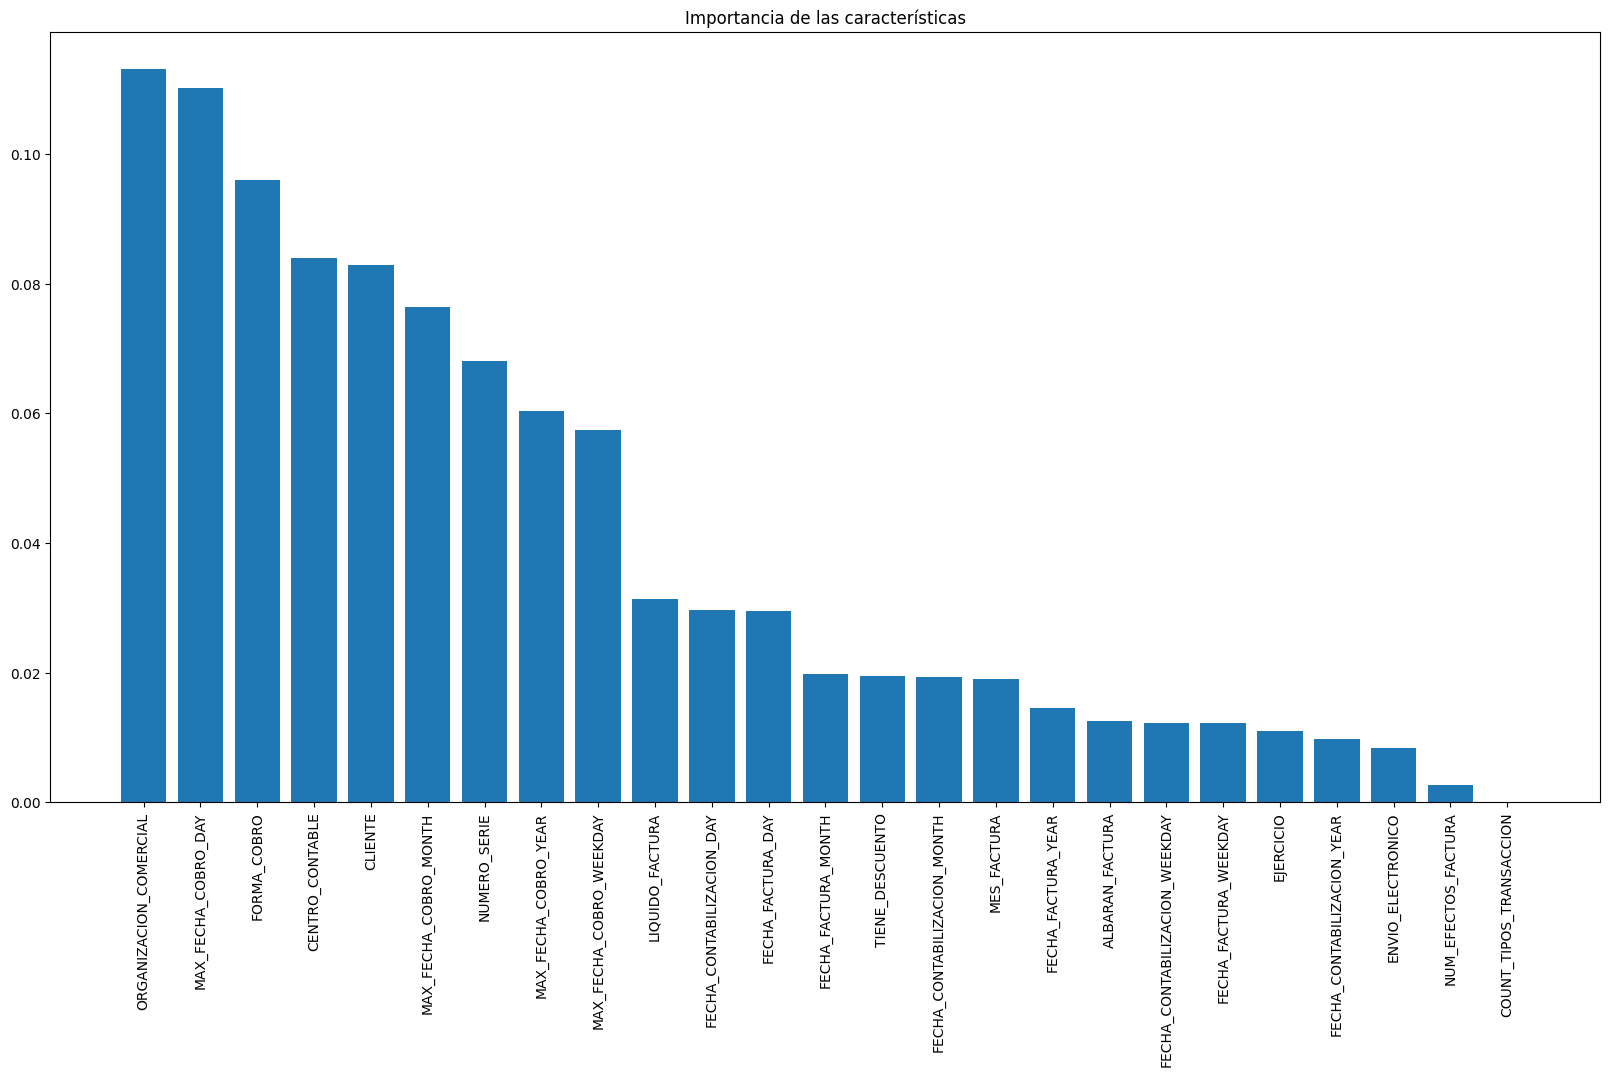

In [21]:
#revisamos la importancia de cada feature
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(20, 10))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [22]:
# evaluamos el modelo random forest
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

# evaluamos el sobreajuste
y_pred_train_rf = rf.predict(X_train)
print("Accuracy Train: ", accuracy_score(y_train, y_pred_train_rf))


Accuracy:  0.9504755452949094
Accuracy Train:  0.9997637851425312


In [23]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     20826
           2       0.74      0.77      0.75      9942
           3       0.86      0.96      0.91     70120
           4       0.79      0.15      0.25     11299

    accuracy                           0.87    112187
   macro avg       0.84      0.72      0.72    112187
weighted avg       0.86      0.87      0.84    112187

[[20584     0   242     0]
 [  125  7630  2154    33]
 [  243  2024 67437   416]
 [   16   646  8981  1656]]


In [26]:
# evaluamos el modelo random forest
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.8673643113729754


In [27]:
# XGBoost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20826
           2       0.85      0.89      0.87      9942
           3       0.95      0.97      0.96     70120
           4       0.93      0.80      0.86     11299

    accuracy                           0.95    112187
   macro avg       0.93      0.91      0.92    112187
weighted avg       0.95      0.95      0.95    112187

[[20817     0     9     0]
 [    0  8803  1121    18]
 [    3  1462 67956   699]
 [    0   130  2168  9001]]
